In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns

from pathlib import Path

from Config.config import PATHS
from Utils.plot_utils import PlotStandardMeasures, PlotVSMeasures

In [2]:
file_name = '2-player-UR.csv'
file = PATHS['human_data'] / Path(file_name)
print(f'Loading data from {file}...')
data = pd.read_csv(file)
data['model'] = data['treatment']
data.head(2)

Loading data from /Users/edgar/Repositorios/Cognitive_Models_El_Farol_Bar_Problem/data/human/2-player-UR.csv...


,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision,model
0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0,score + grid
1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1,score + grid


Text(0.5, 1.0, 'Group average score per round')

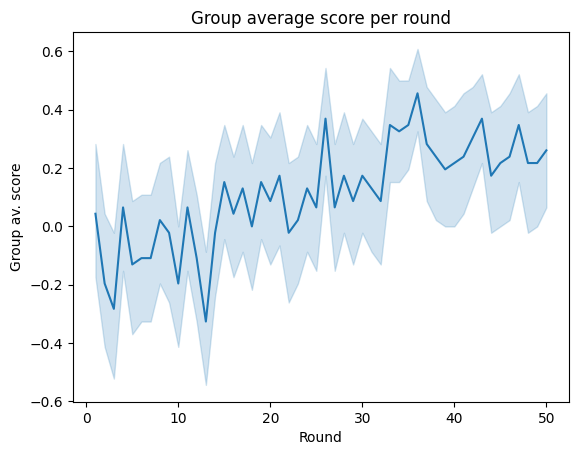

In [3]:
ax = sns.lineplot(
    x='round', y='score', data=data,
    ci=95
)
ax.set_xlabel('Round')
ax.set_ylabel('Group av. score')
ax.set_title('Group average score per round')

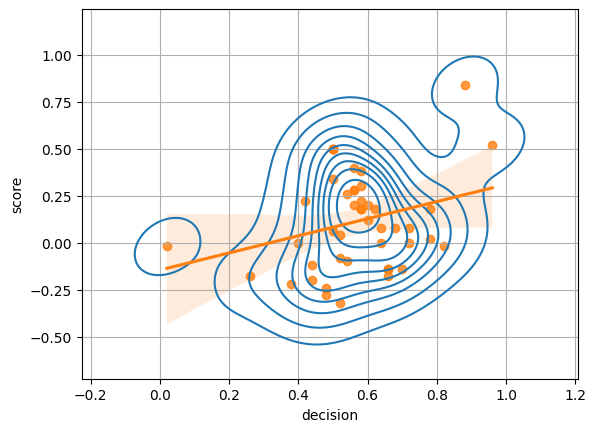

In [4]:
av_scores = data.groupby(['group', 'player']).agg({
    'score':'mean',
    'decision':'mean'
})
ax = sns.kdeplot(
    x='decision', y='score', data=av_scores
)
sns.regplot(
    x='decision', y='score', data=av_scores
)
ax.grid()

In [5]:
p = PlotStandardMeasures(data)

In [6]:
folder = Path('./')
measures = ['alternation_index']
p.plot_measures(measures, folder)

Plotting alternation_index...
Plot saved to alternation_index_1.png


[PosixPath('alternation_index_1.png')]

In [7]:
pv = PlotVSMeasures(data)
pairs = [['efficiency', 'inequality']]
file = Path('eff_vs_alt.png')
pv.two_way_comparisons(pairs, file)

Plot saved to eff_vs_alt.png
